# K-Means Clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

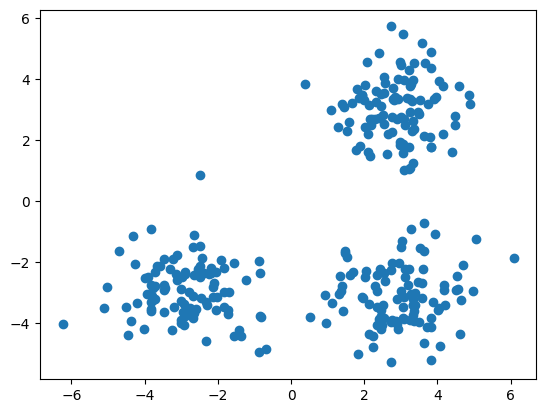

In [ ]:
# genera una matriz de números aleatorios con una distribución normal estándar
# (media 0 y desviación estándar 1)
np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) + np.array([3, 3]),
    np.random.randn(100, 2) + np.array([-3, -3]),
    np.random.randn(100, 2) + np.array([3, -3])
])


plt.scatter(X[:, 0], X[:, 1])
plt.show()


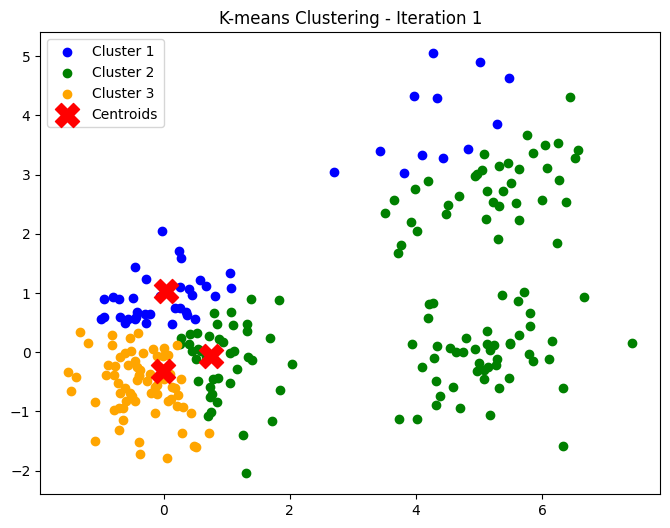

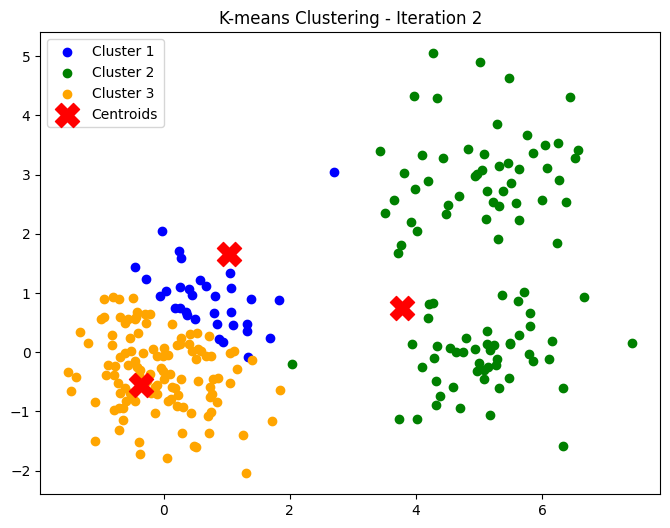

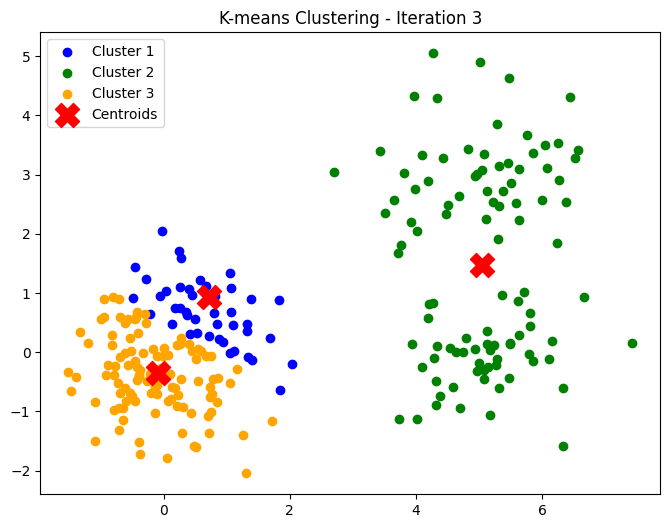

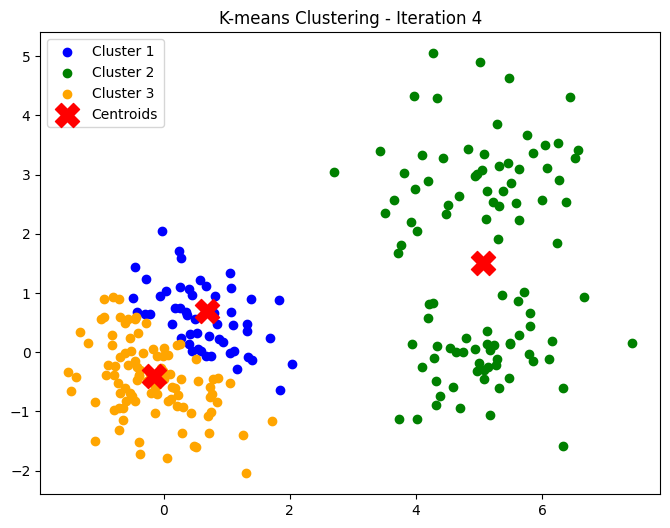

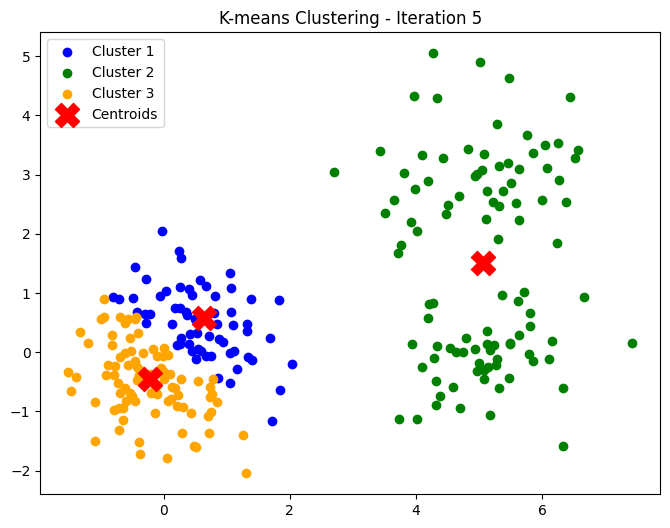

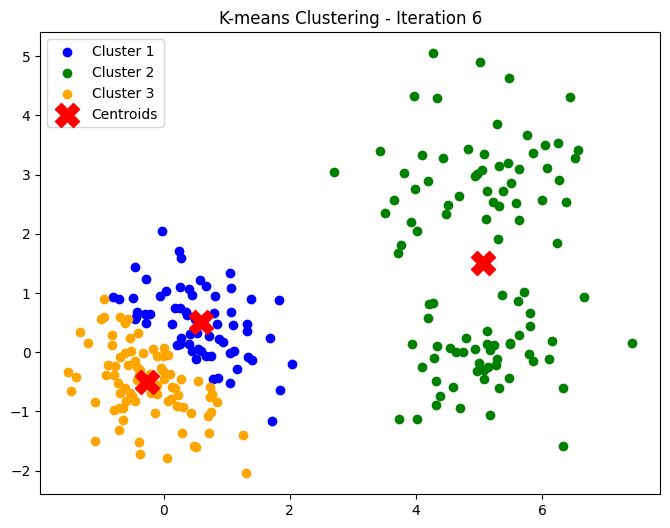

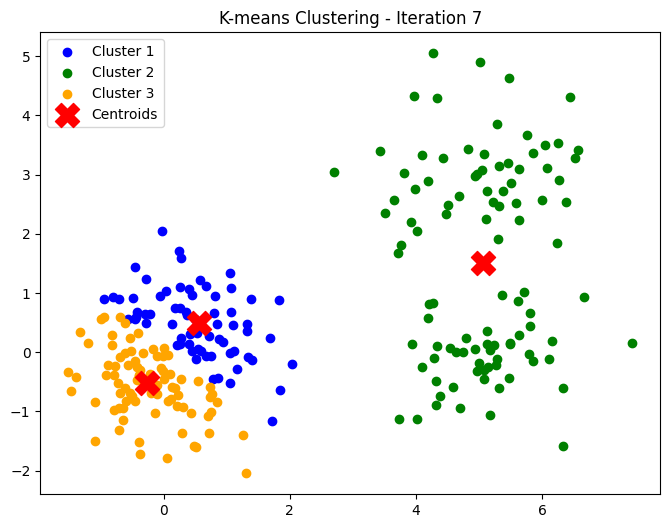

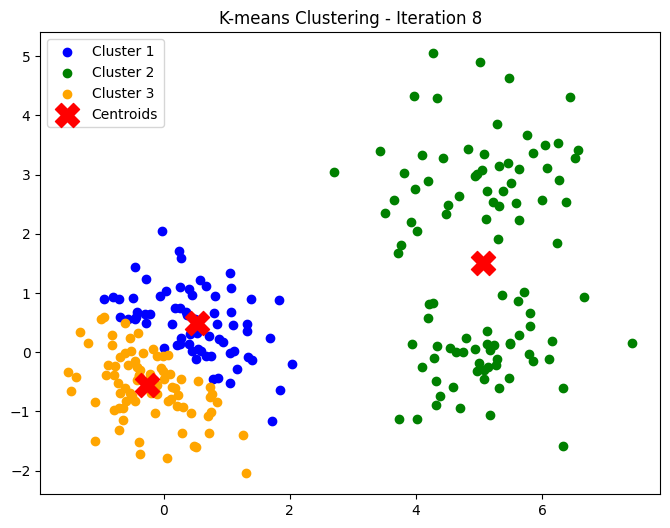

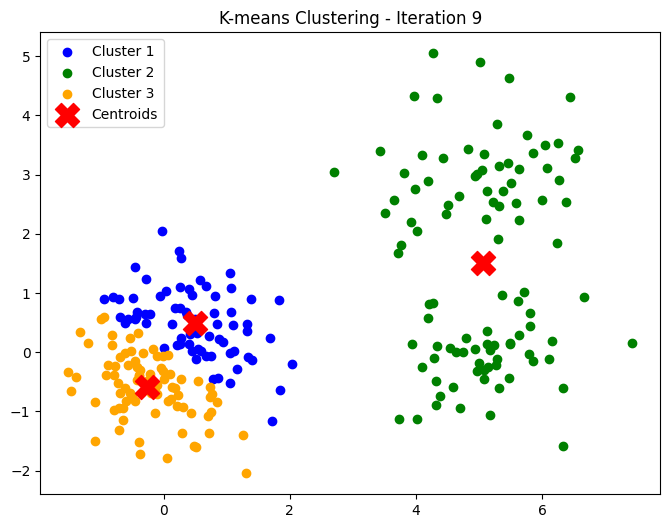

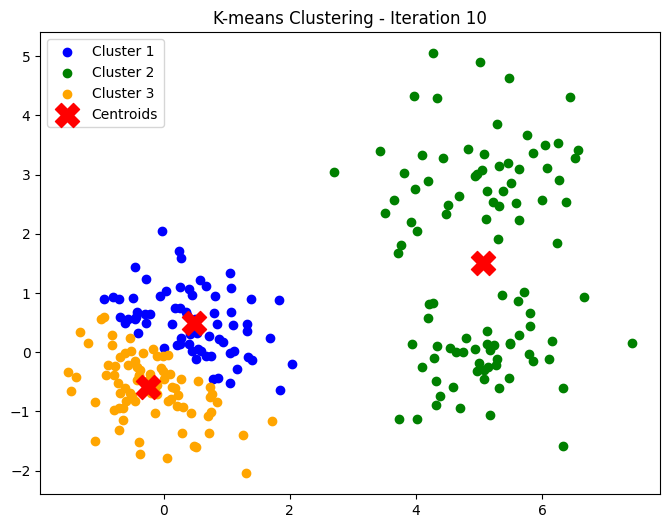

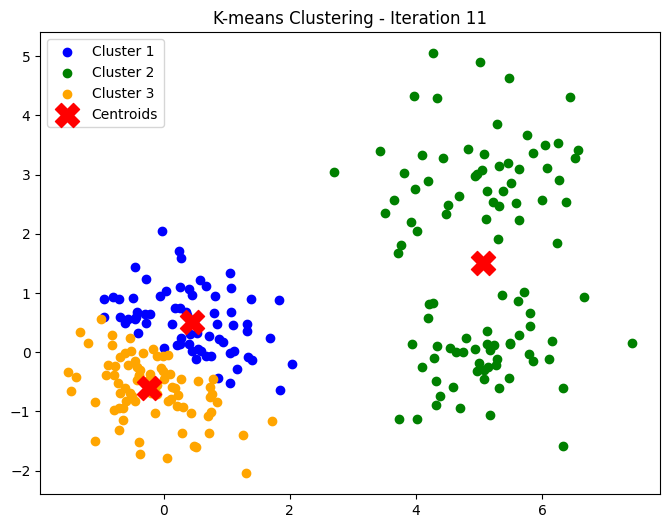

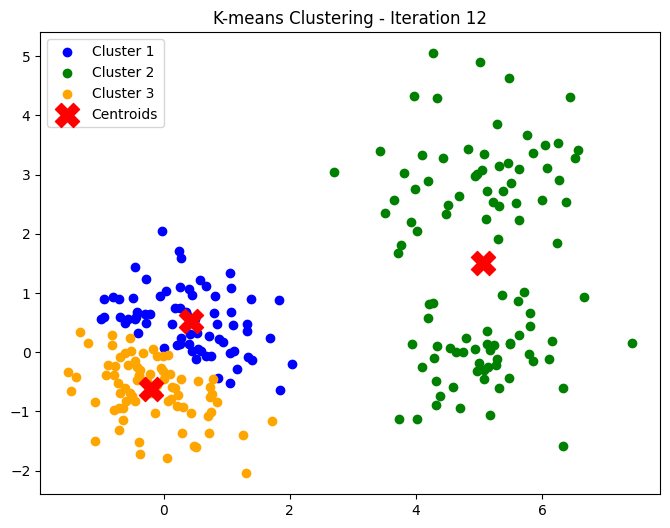

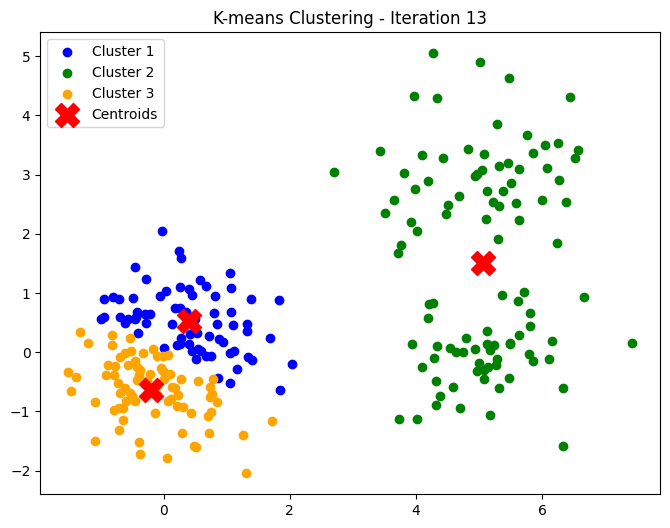

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la distancia euclidiana entre dos puntos
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Función para dibujar el estado actual de los clusters y centroides
def plot_kmeans(X, centroids, labels, iteration, K):
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'orange']
    #colors = [
    #    '#FF5733',
    #    '#33FF57',
    #    '#3357FF',
    #    '#FF33A8',
    #    '#FFD700',
    #    '#800080',
    #    '#FF4500',
    #    '#00CED1',
    #    '#DC143C',
    #    '#8B4513',
    #]

    # Dibujar los puntos, coloreados según su etiqueta de clúster
    for k in range(K):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

    # Dibujar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'K-means Clustering - Iteration {iteration}')
    plt.legend()
    plt.savefig(f'kmeans_iteration_{iteration}.png')
    plt.show()

# Función de K-means desde cero
def kmeans(X, K, rs, max_iters=100):
    np.random.seed(rs)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, K, replace=False)]
    labels = np.zeros(n_samples)

    for iteration in range(max_iters):
        # Paso 1: Asignar cada punto al centroide más cercano
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)

        # Paso 2: Recalcular los centroides
        new_centroids = np.zeros((K, n_features))
        for k in range(K):
            points_in_cluster = X[labels == k]
            if points_in_cluster.size > 0:
                new_centroids[k] = np.mean(points_in_cluster, axis=0)

        # Dibujar la gráfica después de cada iteración
        plot_kmeans(X, centroids, labels, iteration + 1, K)

        # Comprobar si los centroides han cambiado
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Crear datos de prueba
np.random.seed(420)
X = np.vstack([
    np.random.normal(loc=[0, 0], scale=0.8, size=(150, 2)),
    np.random.normal(loc=[5, 3], scale=0.8, size=(50, 2)),
    np.random.normal(loc=[5, 0], scale=0.8, size=(50, 2))
])


# Aplicar el algoritmo K-means
K = 3  # Número de clústeres
rs = 2
labels, centroids = kmeans(X, K, rs)


[[ 4.33960224  2.74289133]
 [ 0.28930882 -0.5160958 ]
 [ 3.71484294  0.16277091]]


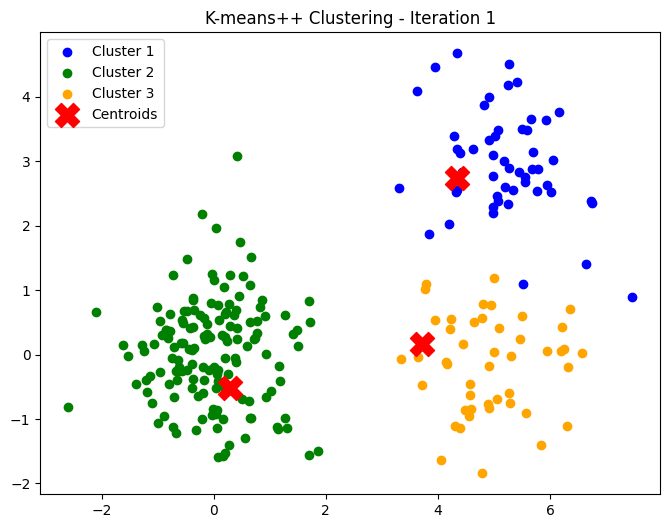

[[ 5.1835855   2.95924565]
 [-0.02724847  0.01837077]
 [ 4.89099272 -0.15701824]]


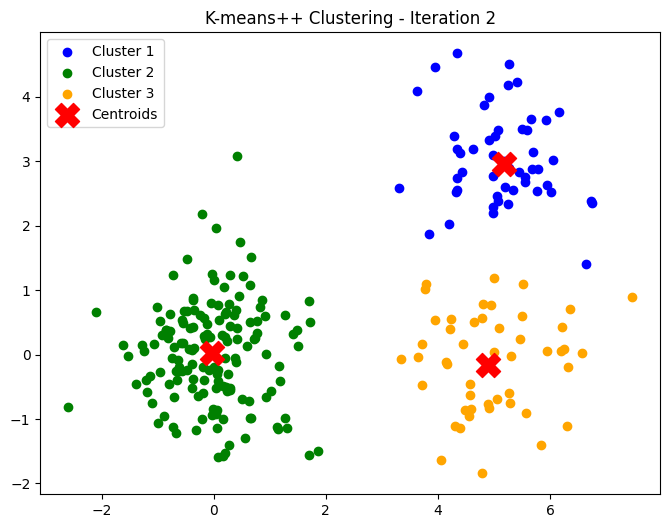

[[ 5.13236522  3.03626381]
 [-0.02724847  0.01837077]
 [ 4.95624619 -0.10998555]]


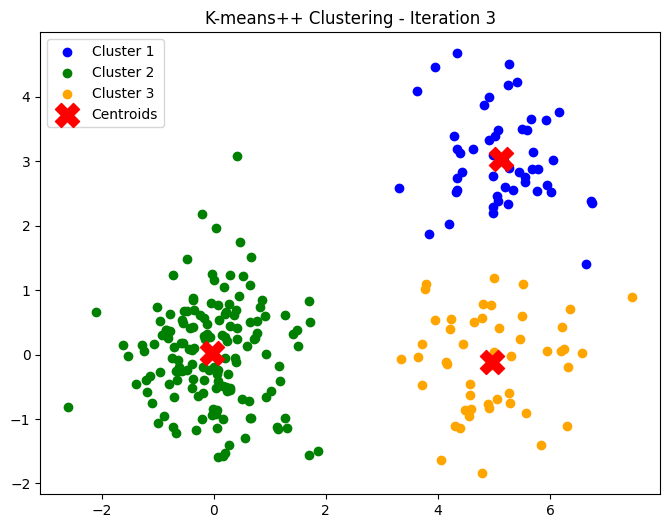

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la distancia euclidiana entre dos puntos
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Función para dibujar el estado actual de los clusters y centroides
def plot_kmeans(X, centroids, labels, iteration, K):
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'orange']

    # Dibujar los puntos, coloreados según su etiqueta de clúster
    for k in range(K):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

    # Dibujar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'K-means++ Clustering - Iteration {iteration}')
    plt.legend()
    plt.savefig(f'kmeanspp_iteration_{iteration}.png')
    plt.show()

# Función para inicializar los centroides utilizando K-means++
def kmeans_plus_plus(X, K, rs):
    np.random.seed(rs)
    n_samples, n_features = X.shape
    centroids = np.zeros((K, n_features))

    # Elegir el primer centroide aleatoriamente
    centroids[0] = X[np.random.randint(n_samples)]

    for k in range(1, K):
        # Calcular la distancia mínima de cada punto a los centroides elegidos
        distances = np.array([min([euclidean_distance(x, c) for c in centroids[:k]]) for x in X])

        # Seleccionar el siguiente centroide con probabilidad proporcional al cuadrado de la distancia
        probabilities = distances / distances.sum()
        centroid_index = np.random.choice(n_samples, p=probabilities)
        centroids[k] = X[centroid_index]

    return centroids

# Función de K-means desde cero
def kmeans(X, K, rs, max_iters=100):
    np.random.seed(rs)
    centroids = kmeans_plus_plus(X, K, rs)  # Inicializar con K-means++
    labels = np.zeros(X.shape[0])

    for iteration in range(max_iters):
        # Paso 1: Asignar cada punto al centroide más cercano
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)

        # Paso 2: Recalcular los centroides
        new_centroids = np.zeros((K, X.shape[1]))
        for k in range(K):
            points_in_cluster = X[labels == k]
            if points_in_cluster.size > 0:
                new_centroids[k] = np.mean(points_in_cluster, axis=0)
        print(centroids)
        # Dibujar la gráfica después de cada iteración
        plot_kmeans(X, centroids, labels, iteration + 1, K)

        # Comprobar si los centroides han cambiado
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Crear datos de prueba
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[0, 0], scale=0.8, size=(150, 2)),
    np.random.normal(loc=[5, 3], scale=0.8, size=(50, 2)),
    np.random.normal(loc=[5, 0], scale=0.8, size=(50, 2))
])

# Aplicar el algoritmo K-means
K = 3  # Número de clústeres
rs = 2
labels, centroids = kmeans(X, K, rs)


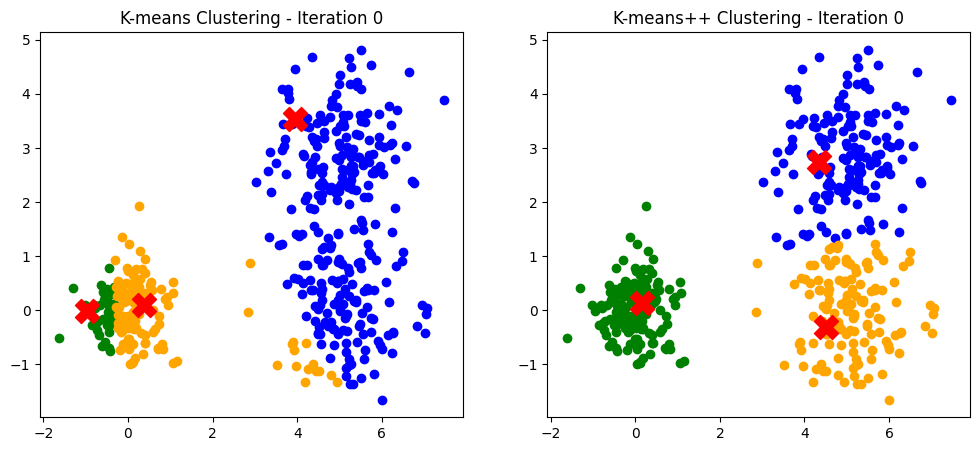

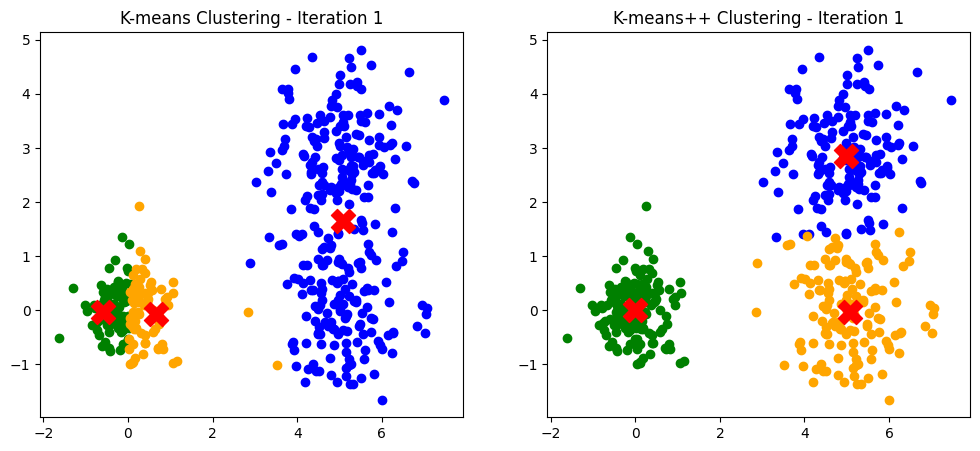

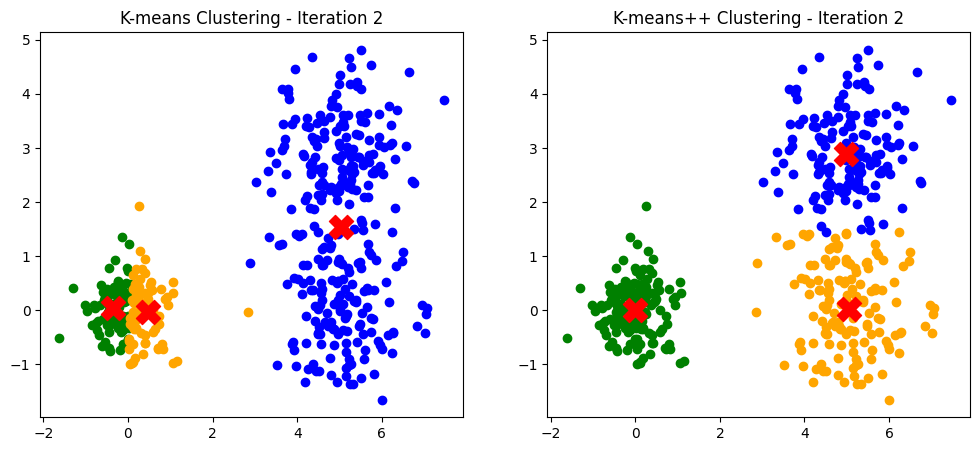

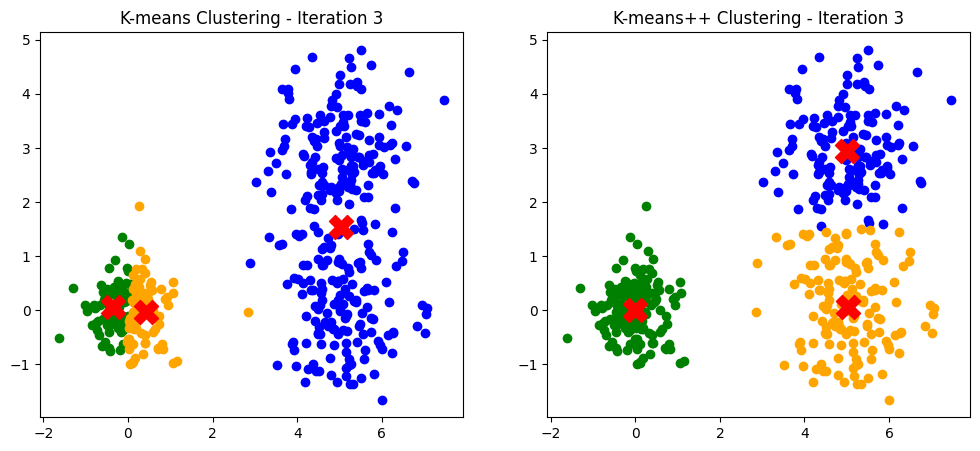

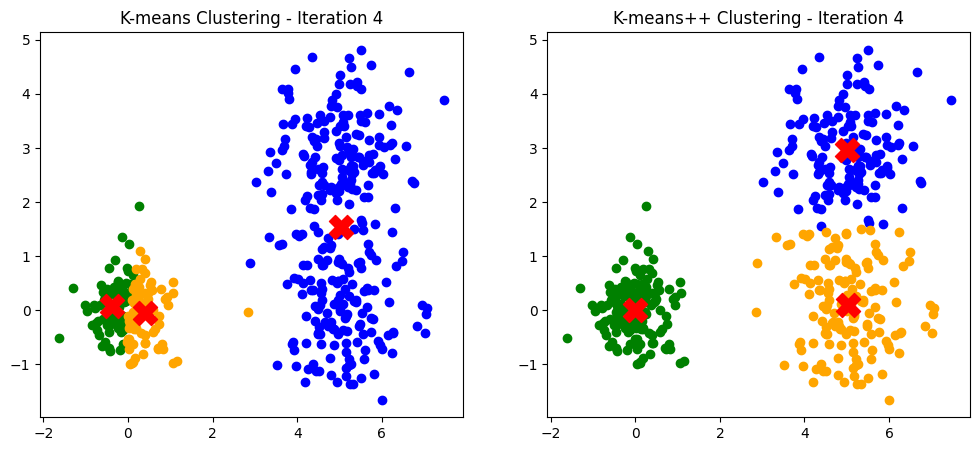

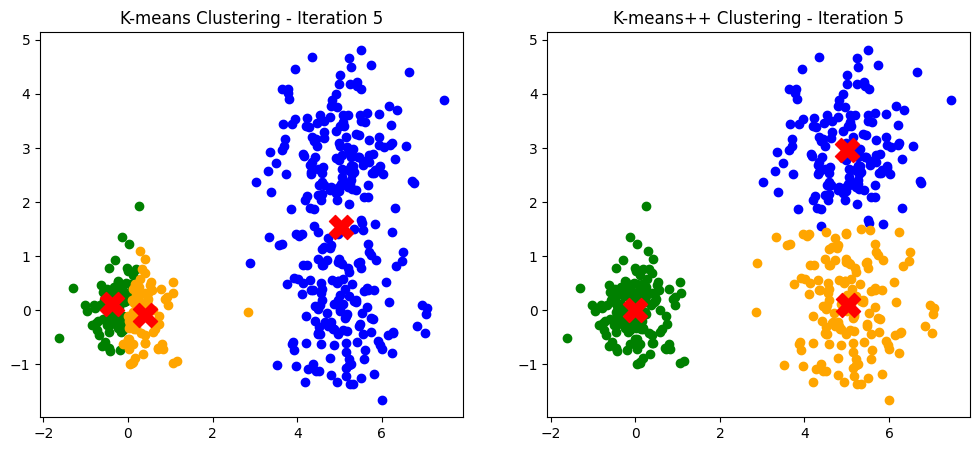

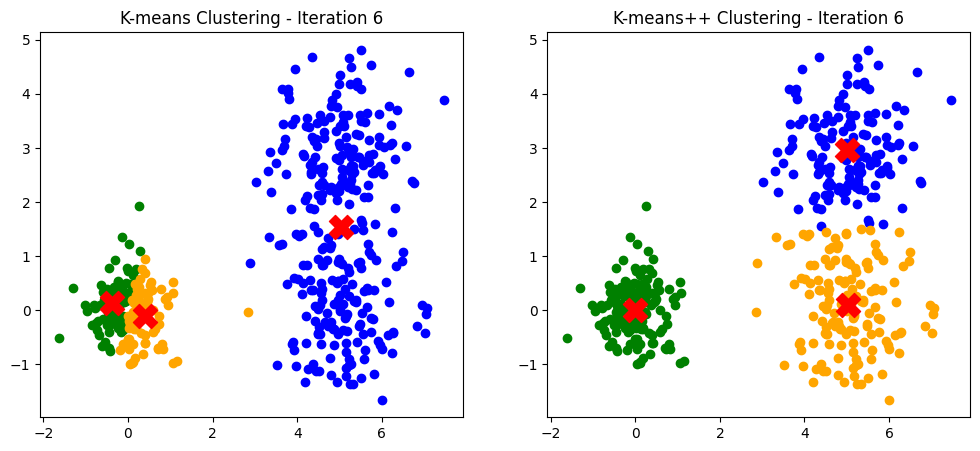

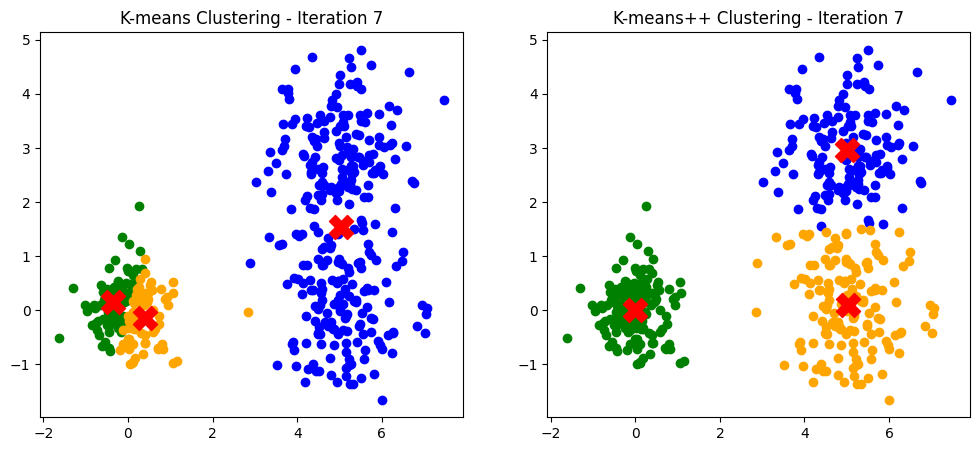

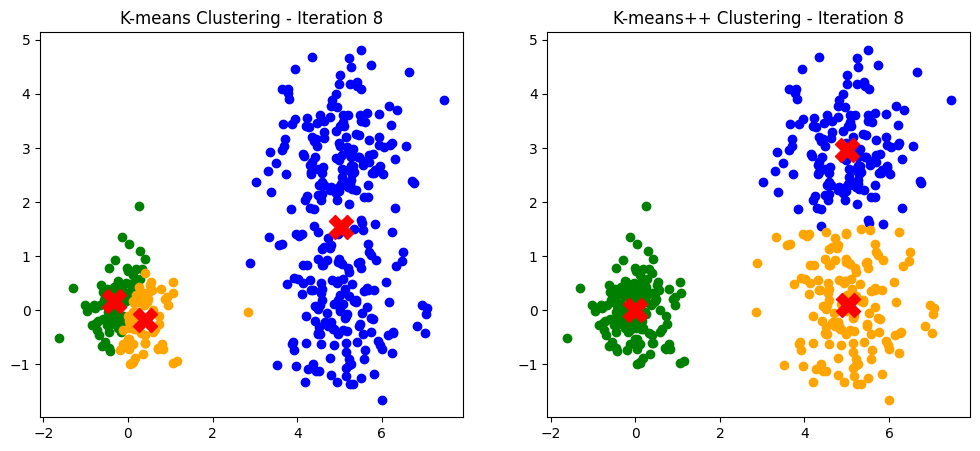

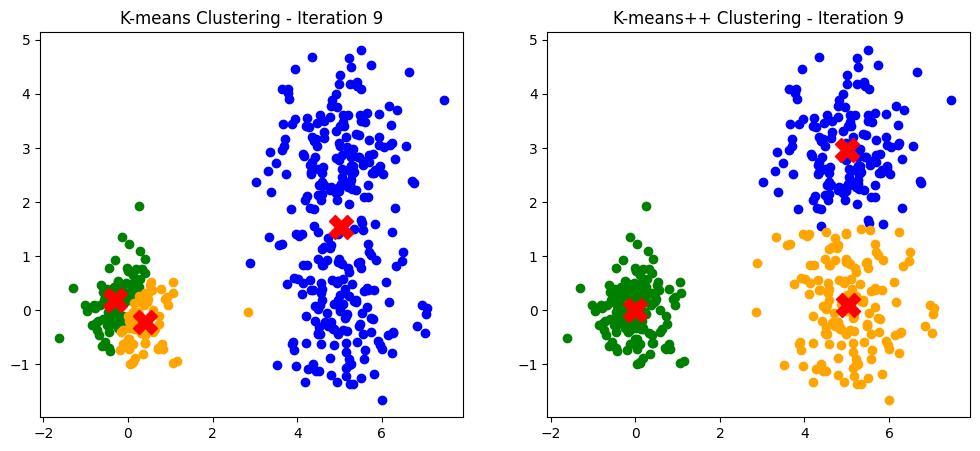

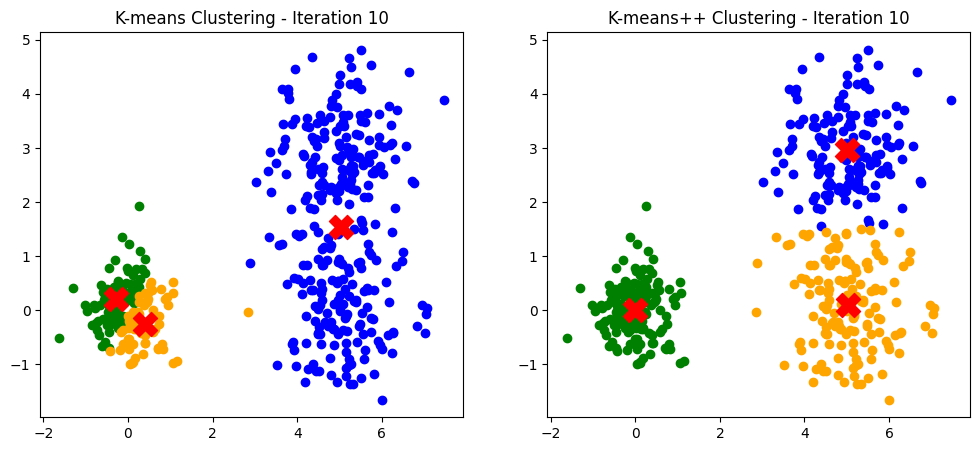

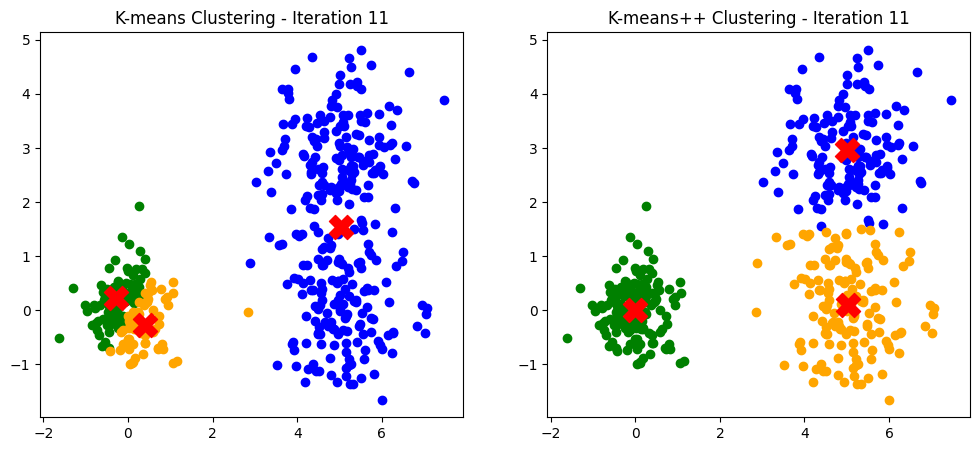

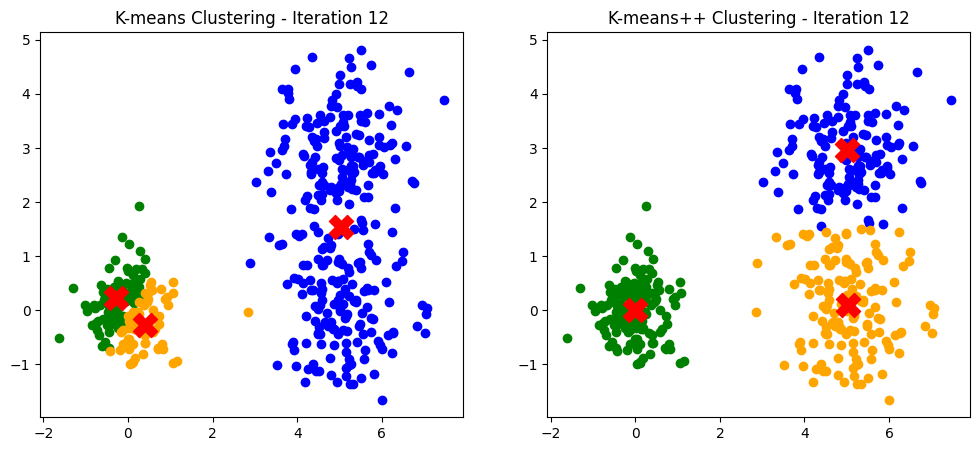

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la distancia euclidiana
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Función para dibujar el estado actual de los clusters y centroides
def plot_kmeans(X, centroids, labels, centroids_kmeanspp, labels_kmeanspp, iteration, K):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    colors = ['blue', 'green', 'orange']

    # Dibujar los puntos, coloreados según su etiqueta de clúster
    for k in range(K):
        cluster_points = X[labels == k]
        axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

    # Dibujar los centroides
    axs[0].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    axs[0].set_title(f'K-means Clustering - Iteration {iteration}')
    #axs[iteration, 0].legend()
    #axs[iteration, 0].savefig(f'kmeanspp_iteration_{iteration}.png')
    #axs[iteration, 0].show()


    # Dibujar los puntos, coloreados según su etiqueta de clúster
    for k in range(K):
        cluster_points = X[labels_kmeanspp == k]
        axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

    # Dibujar los centroides
    axs[1].scatter(centroids_kmeanspp[:, 0], centroids_kmeanspp[:, 1], s=300, c='red', marker='X', label='Centroids')
    axs[1].set_title(f'K-means++ Clustering - Iteration {iteration}')
    #axs[iteration, 0].legend()
    #axs[iteration, 0].savefig(f'kmeanspp_iteration_{iteration}.png')
    #axs[iteration, 0].show()
    #fig.savefig(f"comparison_iteration_{iteration + 1}.png", format="png", dpi=300, bbox_inches="tight")
    fig.savefig(f"comparison_iteration_{iteration + 1}.png", format="png", dpi=300, bbox_inches="tight")
    #plt.close(fig)

# Función para inicializar centroides usando K-means++
def kmeans_plus_plus(X, K):
    np.random.seed(2)
    n_samples, n_features = X.shape
    centroids = np.zeros((K, n_features))

    # Elegir el primer centroide aleatoriamente
    centroids[0] = X[np.random.randint(n_samples)]

    for k in range(1, K):
        # Calcular la distancia mínima de cada punto a los centroides elegidos
        distances = np.array([min([euclidean_distance(x, c) for c in centroids[:k]]) for x in X])

        # Seleccionar el siguiente centroide con probabilidad proporcional al cuadrado de la distancia
        probabilities = distances / distances.sum()
        centroid_index = np.random.choice(n_samples, p=probabilities)
        centroids[k] = X[centroid_index]

    return centroids

# Función de K-means++ que usa la inicialización K-means++ y ejecuta el algoritmo
def kmeans_plus_plus_algorithm(X, K, max_iters=10):

    # KMEANS++
    centroids_pp = kmeans_plus_plus(X, K)  # Inicializar con K-means++
    labels_pp = np.zeros(X.shape[0])

    # KMEANS
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, K, replace=False)]
    labels = np.zeros(n_samples)

    for iteration in range(max_iters):
        # KMEANS++
        # Paso 1: Asignar cada punto al centroide más cercano
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids_pp]
            labels_pp[i] = np.argmin(distances)

        # Paso 2: Recalcular los centroides
        new_centroids_pp = np.zeros((K, X.shape[1]))
        for k in range(K):
            points_in_cluster = X[labels_pp == k]
            if points_in_cluster.size > 0:
                new_centroids_pp[k] = np.mean(points_in_cluster, axis=0)

        # KMEANS
        # Paso 1: Asignar cada punto al centroide más cercano
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)

        # Paso 2: Recalcular los centroides
        new_centroids = np.zeros((K, n_features))
        for k in range(K):
            points_in_cluster = X[labels == k]
            if points_in_cluster.size > 0:
                new_centroids[k] = np.mean(points_in_cluster, axis=0)

        plot_kmeans(X, centroids, labels, centroids_pp, labels_pp, iteration, K)

        # Comprobar si los centroides han cambiado
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
        centroids_pp = new_centroids_pp
    return None

# Crear datos de prueba
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[0, 0], scale=0.5, size=(150, 2)),
    np.random.normal(loc=[5, 3], scale=0.8, size=(150, 2)),
    np.random.normal(loc=[5, 0], scale=0.8, size=(150, 2))
])

# Número de clústeres
K = 3

kmeans_plus_plus_algorithm(X, K, max_iters=13)


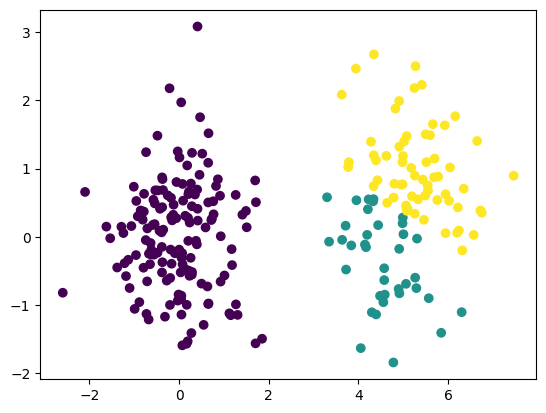

In [ ]:
from sklearn.cluster import KMeans

np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) + np.array([3, 3]),
    np.random.randn(100, 2) + np.array([-3, -3]),
    np.random.randn(100, 2) + np.array([3, -3])
])

np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[0, 0], scale=0.8, size=(150, 2)),
    np.random.normal(loc=[5, 1], scale=0.8, size=(50, 2)),
    np.random.normal(loc=[5, 0], scale=0.8, size=(50, 2))
])


kmeans = KMeans(n_clusters=3, random_state=20, init="k-means++")
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

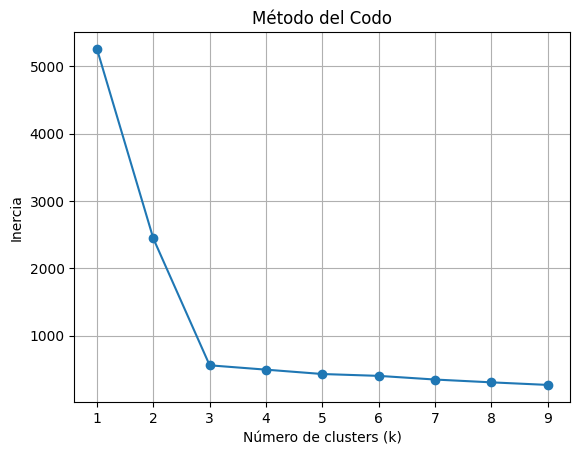

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) + np.array([3, 3]),
    np.random.randn(100, 2) + np.array([-3, -3]),
    np.random.randn(100, 2) + np.array([3, -3])
])

inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.show()


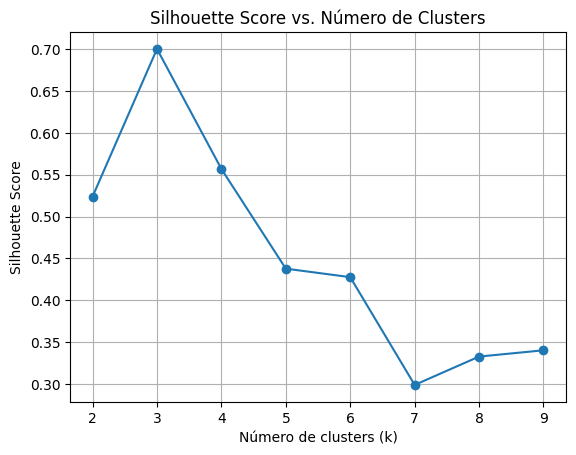

El número óptimo de clusters es: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) + np.array([3, 3]),
    np.random.randn(100, 2) + np.array([-3, -3]),
    np.random.randn(100, 2) + np.array([3, -3])
])

k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Número de Clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print("El número óptimo de clusters es:", best_k)


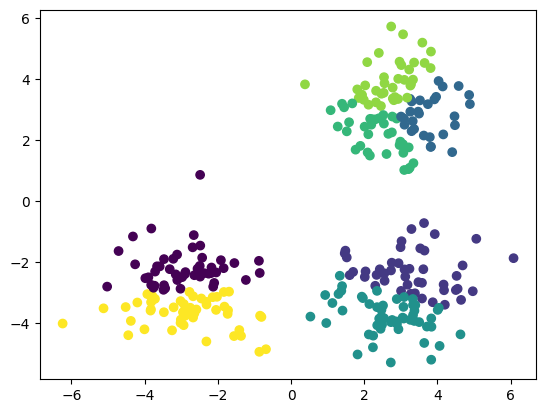

In [ ]:
from sklearn.cluster import KMeans

np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) + np.array([3, 3]),
    np.random.randn(100, 2) + np.array([-3, -3]),
    np.random.randn(100, 2) + np.array([3, -3])
])

kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

8


<ipython-input-16-579abd9d10e0>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


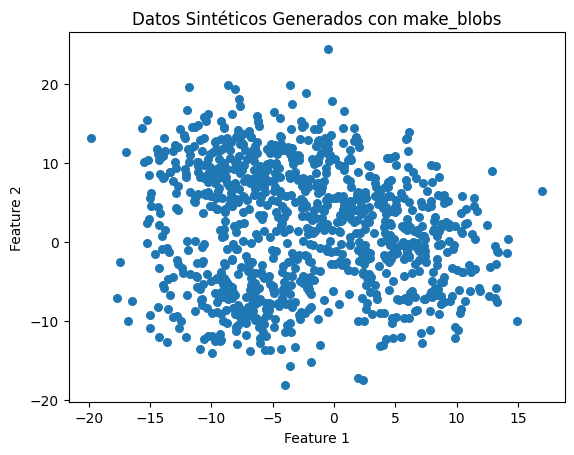

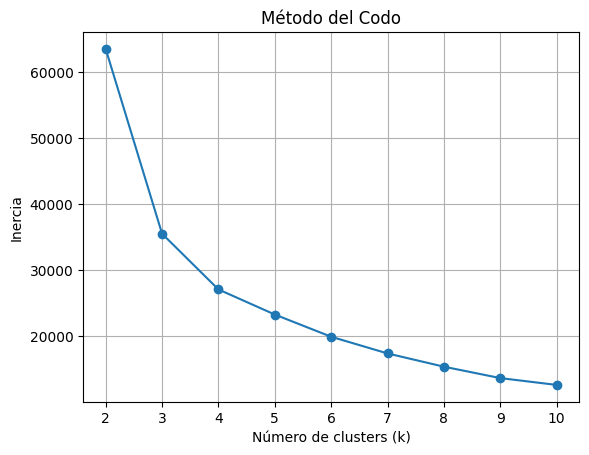

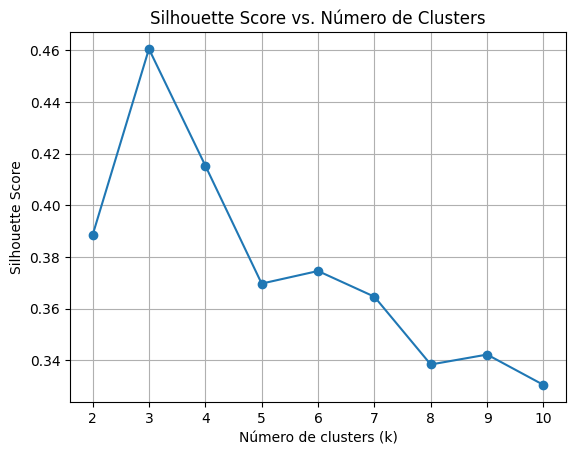

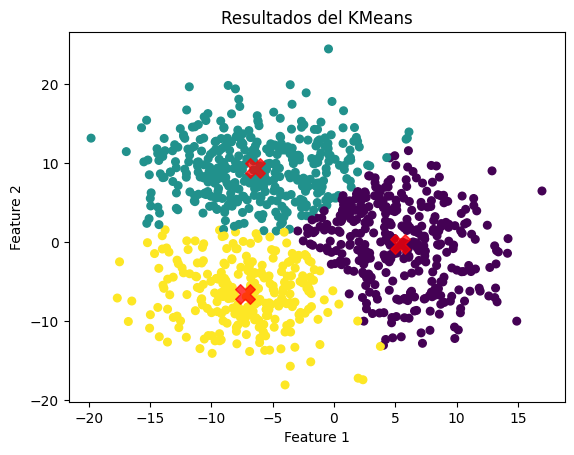

In [ ]:
# EJERCICIO CON DATA DUMMY
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos sintéticos
n_samples = 1000
n_features = 2
n_clusters = np.random.randint(2, 10) # 9 es una buena opcion
print(n_clusters)
random_state = 42

X, _ = make_blobs(n_samples=n_samples,
                  n_features=n_features,
                  centers=n_clusters,
                  random_state=random_state,
                  cluster_std=4)
data_dummy_ejercicio = pd.DataFrame(X, columns=['x', 'y'])
data_dummy_ejercicio.to_csv("data_dummy_ejercicio.csv", index=False)

# Grafica de puntos
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Datos Sintéticos Generados con make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# elbow method
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.show()

# silhouette_score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)

    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Número de Clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Segmentacion final
best_k = k_values[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=best_k, random_state=random_state)
kmeans.fit(X)

labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Centroides
plt.title('Resultados del KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
#


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.3 MB/s eta 0:00:00


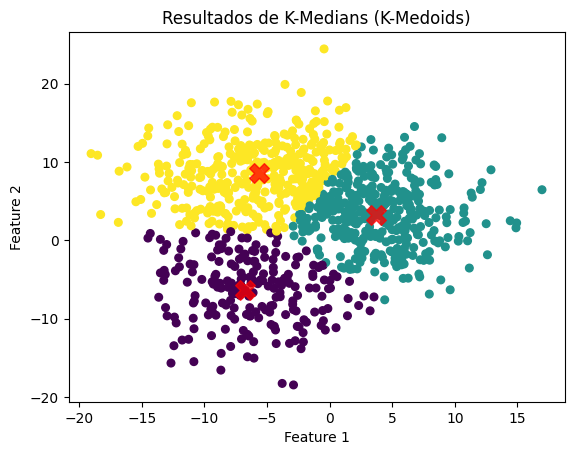

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

random_state = 42


kmedoids = KMedoids(n_clusters=best_k, method='pam', random_state=random_state)
labels = kmedoids.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
centroids = kmedoids.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Resultados de K-Medians (K-Medoids)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
netflix_df = pd.read_csv('Netflix Userbase.csv')
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
netflix_df.shape

(2500, 10)